# The Impact of the replacement of the actor Charlie Sheen with Ashton Kutcher in Two and a half men

# Importing necessary packages

In [16]:
# Installation commands
!pip install selenium
!pip install webdriver-manager

# Core libraries
import time
import csv
import numpy as np
import pandas as pd
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Web Scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

# NLP
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    mean_absolute_error, mean_squared_error, r2_score,
    precision_score, accuracy_score, recall_score, f1_score
)
import sklearn.metrics as mt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Web Scrapping

### **Ratings**

In [ ]:
driver = webdriver.Chrome()

with open('ratings.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Season', 'Title', 'Date', 'Rating', 'Votes', 'Description'])

    for season in range(1, 13):
        driver.get(f"https://www.imdb.com/title/tt0369179/episodes?season={season}")
        time.sleep(2)

        for block in driver.find_elements(By.CSS_SELECTOR, "div.sc-f2169d65-4"):
                writer.writerow([
                    season,
                    block.find_element(By.CSS_SELECTOR, "div.ipc-title__text").text,
                    block.find_element(By.CSS_SELECTOR, "span.sc-f2169d65-10").text,
                    block.find_element(By.CSS_SELECTOR, "span.ipc-rating-star--rating").text,
                    block.find_element(By.CSS_SELECTOR, "span.ipc-rating-star--voteCount").text.strip("()"),
                    block.find_element(By.CSS_SELECTOR, "div.ipc-html-content-inner-div").text
                ])

driver.quit()
print("Done and saved to dataset.csv")

In [2]:
rt = pd.read_csv("ratings.csv")
rt.head(5)

Season                                              Title  \
0       1  S1.E0 ∙ Most Chicks Won't Eat Veal: Original P...   
1       1                                      S1.E1 ∙ Pilot   
2       1                        S1.E2 ∙ Big Flappy Bastards   
3       1  S1.E3 ∙ Go East on Sunset Until You Reach the ...   
4       1  S1.E4 ∙ If I Can't Write My Chocolate Song, I'...   

                Date  Rating   Votes  \
0   Fri, Jun 2, 2006     8.1   (1.3K   
1  Mon, Sep 22, 2003     8.1   (2.6K   
2  Mon, Sep 29, 2003     7.7   (2.2K   
3   Mon, Oct 6, 2003     7.7     (2K   
4  Mon, Oct 13, 2003     7.9   (1.9K   

                                         Description  
0  After his wife kicks him out of the house, Ala...  
1  After 12 years of marriage, Alan's wife Judith...  
2  Alan punishes Jake for an incident at Judith's...  
3  Charlie and Alan go out drinking. Alan tries t...  
4  As Charlie tries to write a new jingle, Berta ...

### **Reviews**

In [ ]:
driver = webdriver.Chrome()

with open('reviews.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Date', 'Rating', 'Thumbs_up', 'Thumbs_down', 'Description'])
    driver.get("https://www.imdb.com/title/tt0369179/reviews/?ref_=tt_ov_ql_2")
    time.sleep(60)
    reviews = []
    reviews = driver.find_elements(By.CSS_SELECTOR, "article.sc-571af6d2-1")
    for review in reviews:
            print("Processing review...")
            try:

                title = review.find_element(By.CSS_SELECTOR, "h3.ipc-title__text").text
            except:
                title = "N/A"
                print("Could not find title for review")

            try:

                date = review.find_element(By.CSS_SELECTOR, "li.review-date").text
            except:
                date = "N/A"
                print("Could not find date for review")

            try:

                rating = review.find_element(By.CSS_SELECTOR, "span.ipc-rating-star--rating").text
            except:
                rating = "N/A"
                print("No rating found for this review")

            try:

                thumbs_up = review.find_element(By.CSS_SELECTOR, "span.ipc-voting__label__count--up").text
            except:
                thumbs_up = "0"
                print("Could not find thumbs up count")

            try:

                thumbs_down = review.find_element(By.CSS_SELECTOR, "span.ipc-voting__label__count--down").text
            except:
                thumbs_down = "0"
                print("Could not find thumbs down count")
            try:

                spoiler_buttons = review.find_elements(
                  By.XPATH,
                 ".//button[contains(., 'Spoiler') or contains(@aria-label, 'Expand')]"
                   )


                if spoiler_buttons:
                    for button in spoiler_buttons:
                     try:
                        driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", button)
                        time.sleep(0.5)

                        WebDriverWait(driver, 5).until(
                            EC.element_to_be_clickable(button)
                        )

                        driver.execute_script("arguments[0].click();", button)
                        time.sleep(1)
                        break
                     except Exception as e:
                        print(f"Couldn't click one spoiler button: {str(e)}")
                        continue
            except Exception as e:
                print(f"Error finding spoiler buttons: {str(e)}")


            content_selectors = [
                "div.ipc-html-content-inner-div",
                "div.text.show-more__control",
                "div.ipc-overflowText--children"
            ]

            content = "N/A"
            for content_selector in content_selectors:
                try:
                    elements = review.find_elements(By.CSS_SELECTOR, content_selector)
                    if elements:
                        content = elements[0].text
                        break
                except:
                    continue


            writer.writerow([title, date, rating, thumbs_up, thumbs_down, content])
            print("Successfully saved one review!")

driver.quit()
print(f"Finished! Total reviews saved: {len(reviews)}")

In [9]:
rv = pd.read_csv("reviews.csv")
rv.head(5)

Title          Date  Rating  \
0                              Charlie Yes Ashton No   Jan 5, 2022     8.0   
1  First 8 seasons are classic while the left are...  Dec 20, 2013     8.0   
2              Charlie Sheen and a man and a half ;)  Nov 21, 2021     7.0   
3  There's absolutely no reason to watch this sho...  Apr 11, 2012     NaN   
4  The show with Charlie Sheen gets a 10, the sho...  Nov 16, 2022    10.0   

   Thumbs_up  Thumbs_down                                        Description  
0         99            3  The show had a soul when Charlie Sheen was in ...  
1        338           20  I'm giving 8 stars to the S1-S8. They are so f...  
2         84            4  It was only two and a half men until season ei...  
3        499           46  Two and a half men doesn't deserve to go on,no...  
4         45            3  The chemistry between Charlie (Sheen), Jon Cry...

## Data Cleaning

### **Ratings**

In [3]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       262 non-null    int64  
 1   Title        262 non-null    object 
 2   Date         262 non-null    object 
 3   Rating       262 non-null    float64
 4   Votes        262 non-null    object 
 5   Description  262 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 12.4+ KB


In [4]:
rt["Episode"] = rt["Title"].str[4:7]
rt['Episode'] = rt['Episode'].str.replace("E", "")
rt['Episode'] = rt['Episode'].str.replace("∙", "")
rt['Episode'] = rt['Episode'].astype(int)
rt['Title'] = rt['Title'].str[7:].str.replace("∙", "")
rt["Votes"] = rt['Votes'].str.replace('(', '')
rt['Votes'] = np.where(rt['Votes'].str.contains('K'),(rt['Votes'].str.replace('K', '').astype(float) * 1000).astype(int), rt['Votes'])
rt["Votes"] = rt['Votes'].astype(int)
rt["Actor"]= np.where(rt["Season"] <= 8, "Charlie Sheen", "Ashton Kutcher")
insert_index = rt.columns.get_loc("Season") + 1
rt.insert(insert_index,"Actor", rt.pop("Actor"))
rt.insert(insert_index,"Episode", rt.pop("Episode"))
rt["Date"] = pd.to_datetime(rt["Date"])
rt["Description_length"] = rt["Description"].apply(func=lambda text: len(text))
rt.head(5)

Season  Episode          Actor  \
0       1        0  Charlie Sheen   
1       1        1  Charlie Sheen   
2       1        2  Charlie Sheen   
3       1        3  Charlie Sheen   
4       1        4  Charlie Sheen   

                                               Title       Date  Rating  \
0         Most Chicks Won't Eat Veal: Original Pilot 2006-06-02     8.1   
1                                              Pilot 2003-09-22     8.1   
2                                Big Flappy Bastards 2003-09-29     7.7   
3   Go East on Sunset Until You Reach the Gates o... 2003-10-06     7.7   
4   If I Can't Write My Chocolate Song, I'm Going... 2003-10-13     7.9   

   Votes                                        Description  \
0   1300  After his wife kicks him out of the house, Ala...   
1   2600  After 12 years of marriage, Alan's wife Judith...   
2   2200  Alan punishes Jake for an incident at Judith's...   
3   2000  Charlie and Alan go out drinking. Alan tries t...   
4   1900  As Charlie tries to write a new jingle, Berta ...   

   Description_length  
0                  86  
1                 225  
2                 228  
3                 154  
4                 202

In [5]:
rt.isna().sum()

Season                0
Episode               0
Actor                 0
Title                 0
Date                  0
Rating                0
Votes                 0
Description           0
Description_length    0
dtype: int64

In [6]:
rt.duplicated().sum()

np.int64(0)

In [7]:
rt.to_csv('cleaned_ratings.csv', index=False)

### **Reviews**

In [10]:
rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        551 non-null    object 
 1   Date         551 non-null    object 
 2   Rating       486 non-null    float64
 3   Thumbs_up    551 non-null    int64  
 4   Thumbs_down  551 non-null    int64  
 5   Description  551 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 26.0+ KB


In [11]:
rv.duplicated().sum()

np.int64(0)

In [12]:
rv.isna().sum()

Title           0
Date            0
Rating         65
Thumbs_up       0
Thumbs_down     0
Description     0
dtype: int64

In [13]:
rv= rv.dropna()

In [17]:
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

In [18]:
rv["Date"] = pd.to_datetime(rv["Date"])
rv["Rating"]= rv["Rating"].astype(int)
rv['Desc_c'] = rv['Description'].apply(preprocess_text)
rv['Tit_c'] = rv['Title'].apply(preprocess_text)
rv.head()


Title       Date  Rating  \
0                              Charlie Yes Ashton No 2022-01-05       8   
1  First 8 seasons are classic while the left are... 2013-12-20       8   
2              Charlie Sheen and a man and a half ;) 2021-11-21       7   
4  The show with Charlie Sheen gets a 10, the sho... 2022-11-16      10   
5                               For me, it's over... 2013-01-03       6   

   Thumbs_up  Thumbs_down                                        Description  \
0         99            3  The show had a soul when Charlie Sheen was in ...   
1        338           20  I'm giving 8 stars to the S1-S8. They are so f...   
2         84            4  It was only two and a half men until season ei...   
4         45            3  The chemistry between Charlie (Sheen), Jon Cry...   
5        125            8  Forget about watching the new episodes, with W...   

                                              Desc_c  \
0  the show had a soul when charlie sheen was in ...   
1  im giving  stars to the ss they are so funny t...   
2  it was only two and a half men until season ei...   
4  the chemistry between charlie sheen jon cryer ...   
5  forget about watching the new episodes with wa...   

                                               Tit_c  
0                              charlie yes ashton no  
1  first  seasons are classic while the left are ...  
2                 charlie sheen and a man and a half  
4  the show with charlie sheen gets a  the show w...  
5                                    for me its over

In [ ]:
rv.to_csv('cleaned_reviews.csv', index=False)

## Understand the data

### **Ratings**

In [22]:
rt.describe()

Season     Episode                           Date      Rating  \
count  262.000000  262.000000                            262  262.000000   
mean     6.221374   11.557252  2009-03-31 15:56:20.152671744    7.294275   
min      1.000000    0.000000            2003-09-22 00:00:00    3.700000   
25%      3.000000    6.000000            2006-03-25 06:00:00    6.500000   
50%      6.000000   11.000000            2009-02-19 12:00:00    7.700000   
75%      9.000000   17.000000            2012-03-13 18:00:00    7.900000   
max     12.000000   24.000000            2015-02-19 00:00:00    8.700000   
std      3.439215    6.644977                            NaN    0.902278   

             Votes  Description_length  
count   262.000000          262.000000  
mean   1340.515267          155.026718  
min     826.000000           47.000000  
25%    1125.000000          113.250000  
50%    1300.000000          144.500000  
75%    1500.000000          173.750000  
max    3700.000000          638.000000  
std     367.411018           72.883332

In [23]:
rt.groupby(["Actor"]).agg({"Rating" :["min","mean","max"],"Votes":["min","mean","max"],"Episode": ["count"],"Description_length":["min","mean","max"]})

Rating                Votes                    Episode  \
                  min      mean  max   min         mean   max   count   
Actor                                                                   
Ashton Kutcher    3.7  6.104762  7.1   826  1088.273810  3700      84   
Charlie Sheen     7.2  7.855618  8.7  1200  1459.550562  2600     178   

               Description_length                   
                              min        mean  max  
Actor                                               
Ashton Kutcher                 76  144.666667  481  
Charlie Sheen                  47  159.915730  638

In [24]:
rt.groupby(["Season","Actor"]).agg({"Rating" :["min","mean","max"],"Votes":["min","mean","max"], "Episode": ["count"], "Date": ["min","max"],"Description_length":["min","mean","max"]})

Rating                Votes                    Episode  \
                         min      mean  max   min         mean   max   count   
Season Actor                                                                   
1      Charlie Sheen     7.5  7.908000  8.6  1300  1844.000000  2600      25   
2      Charlie Sheen     7.3  7.875000  8.7  1400  1562.500000  2000      24   
3      Charlie Sheen     7.5  7.925000  8.4  1300  1475.000000  2000      24   
4      Charlie Sheen     7.5  7.816667  8.6  1300  1404.166667  1800      24   
5      Charlie Sheen     7.6  7.894737  8.6  1300  1384.210526  2000      19   
6      Charlie Sheen     7.5  7.858333  8.7  1200  1337.500000  1800      24   
7      Charlie Sheen     7.4  7.786364  8.5  1200  1272.727273  1800      22   
8      Charlie Sheen     7.2  7.743750  8.4  1200  1293.750000  1600      16   
9      Ashton Kutcher    5.3  6.004167  6.6   983  1328.458333  3700      24   
10     Ashton Kutcher    5.6  6.421739  7.0   872   999.913043  1300      23   
11     Ashton Kutcher    6.0  6.340909  7.1   826   916.136364  1200      22   
12     Ashton Kutcher    3.7  5.433333  5.9   836  1091.933333  3700      15   

                            Date            Description_length              \
                             min        max                min        mean   
Season Actor                                                                 
1      Charlie Sheen  2003-09-22 2006-06-02                 47  191.320000   
2      Charlie Sheen  2004-09-20 2005-05-23                 70  162.916667   
3      Charlie Sheen  2005-09-19 2006-05-22                 68  179.083333   
4      Charlie Sheen  2006-09-18 2007-05-14                 82  150.791667   
5      Charlie Sheen  2007-09-24 2008-05-19                 77  154.210526   
6      Charlie Sheen  2008-09-22 2009-05-18                 70  149.875000   
7      Charlie Sheen  2009-09-21 2010-05-24                 80  145.045455   
8      Charlie Sheen  2010-09-20 2011-02-14                 80  133.562500   
9      Ashton Kutcher 2011-09-19 2012-05-14                104  154.500000   
10     Ashton Kutcher 2012-09-27 2013-05-09                 76  144.434783   
11     Ashton Kutcher 2013-09-26 2014-05-08                 94  141.500000   
12     Ashton Kutcher 2014-10-30 2015-02-19                 81  133.933333   

                            
                       max  
Season Actor                
1      Charlie Sheen   537  
2      Charlie Sheen   492  
3      Charlie Sheen   638  
4      Charlie Sheen   212  
5      Charlie Sheen   237  
6      Charlie Sheen   220  
7      Charlie Sheen   219  
8      Charlie Sheen   222  
9      Ashton Kutcher  233  
10     Ashton Kutcher  481  
11     Ashton Kutcher  188  
12     Ashton Kutcher  190

In [ ]:
rt["Actor"].value_counts(normalize=True)

Actor
Charlie Sheen     0.679389
Ashton Kutcher    0.320611
Name: proportion, dtype: float64

In [ ]:
rt[["Actor", "Description"]].groupby(by="Actor")[["Description"]].agg(func=lambda array: np.mean([len(text) for text in array]))

Description
Actor                      
Ashton Kutcher   144.666667
Charlie Sheen    159.915730

In [ ]:
rt[["Actor", "Title"]].groupby(by="Actor")[["Title"]].agg(func=lambda array: np.mean([len(text) for text in array]))

Title
Actor                    
Ashton Kutcher  27.035714
Charlie Sheen   27.382022

### **Reviews**

In [ ]:
rv.groupby(["Rating"]).agg({"Rating":["count"], "Thumbs_up" :["sum"],"Thumbs_down":["sum"],"Date": ["min","max"]})

Rating Thumbs_up Thumbs_down       Date           
        count       sum         sum        min        max
Rating                                                   
1          91      2763        1031 2003-11-17 2024-01-04
2          15        69          94 2007-07-23 2022-07-27
3          19        50          52 2007-02-12 2024-07-14
4          13        47          44 2008-02-03 2024-09-10
5          34       245          90 2008-04-17 2024-11-14
6          28       211          65 2007-08-21 2025-03-24
7          62       295          72 2005-05-31 2025-03-20
8          62      1608         351 2005-10-06 2025-03-30
9          42       277         192 2006-07-28 2024-05-28
10        120       563         369 2004-01-06 2024-09-21

In [ ]:
rv.describe()

Date      Rating   Thumbs_up  Thumbs_down
count                            486  486.000000  486.000000   486.000000
mean   2016-12-12 11:24:26.666666752    6.329218   12.609053     4.855967
min              2003-11-17 00:00:00    1.000000    0.000000     0.000000
25%              2012-05-17 06:00:00    3.000000    1.000000     1.000000
50%              2018-08-30 00:00:00    7.000000    2.000000     2.000000
75%              2021-03-18 00:00:00    9.000000    5.000000     4.000000
max              2025-03-30 00:00:00   10.000000  724.000000   139.000000
std                              NaN    3.314238   52.475929    12.420628

## visualizations

### **Ratings**

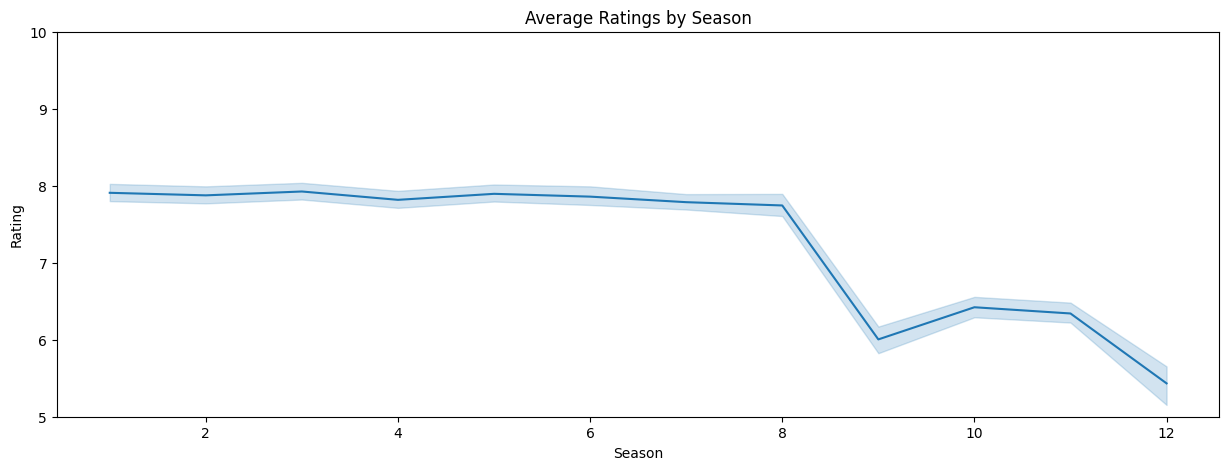

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(data=rt, x='Season', y='Rating')
plt.title("Average Ratings by Season")
plt.ylim(5, 10)
plt.show()

Text(0, 0.5, 'Rating')

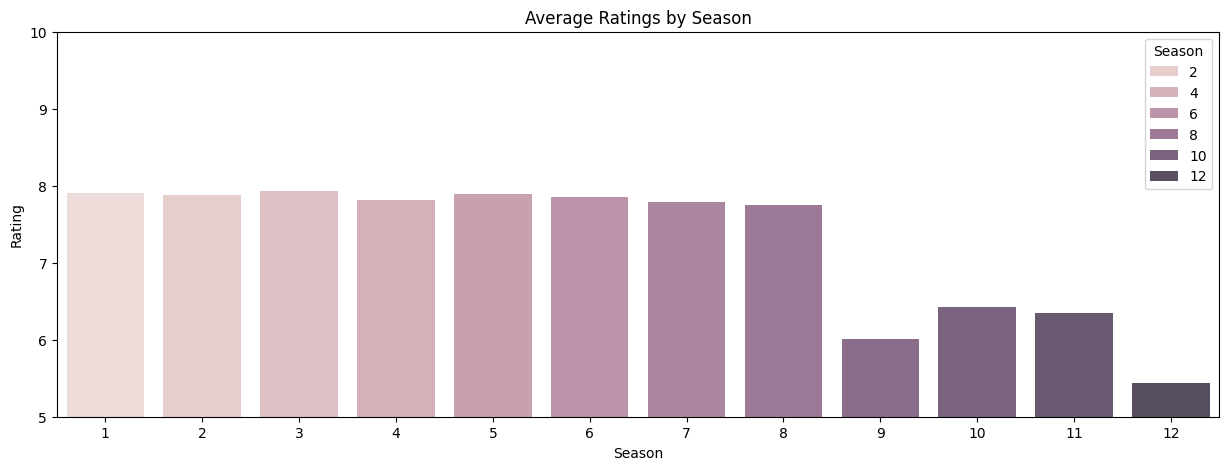

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(rt , x="Season", y="Rating",
            estimator="mean", errorbar=None, alpha=0.8, hue='Season')
plt.title("Average Ratings by Season")
plt.ylim(5, 10)
plt.ylabel("Rating")

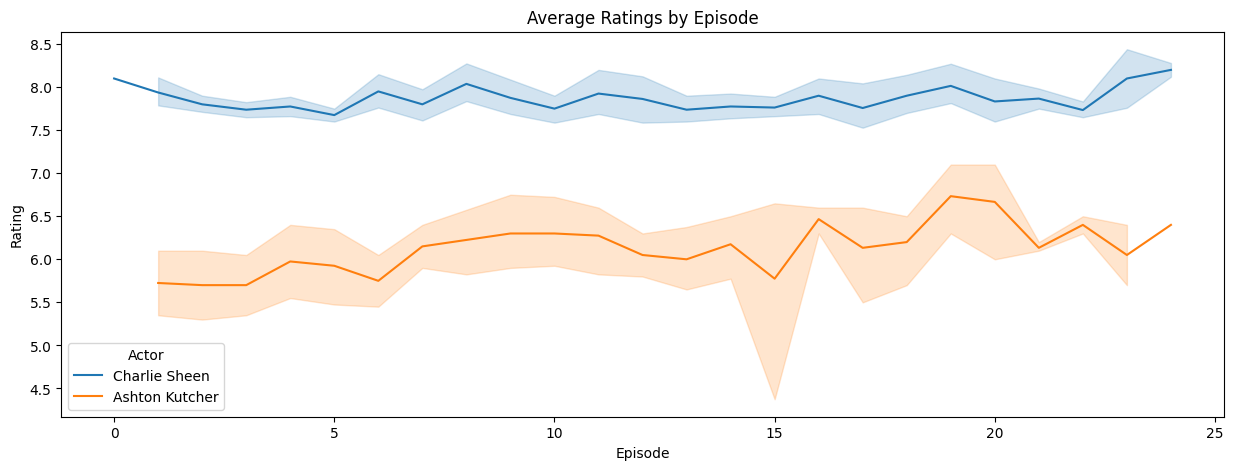

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=rt, x='Episode', y='Rating', hue="Actor" )
plt.title("Average Ratings by Episode")
plt.show()

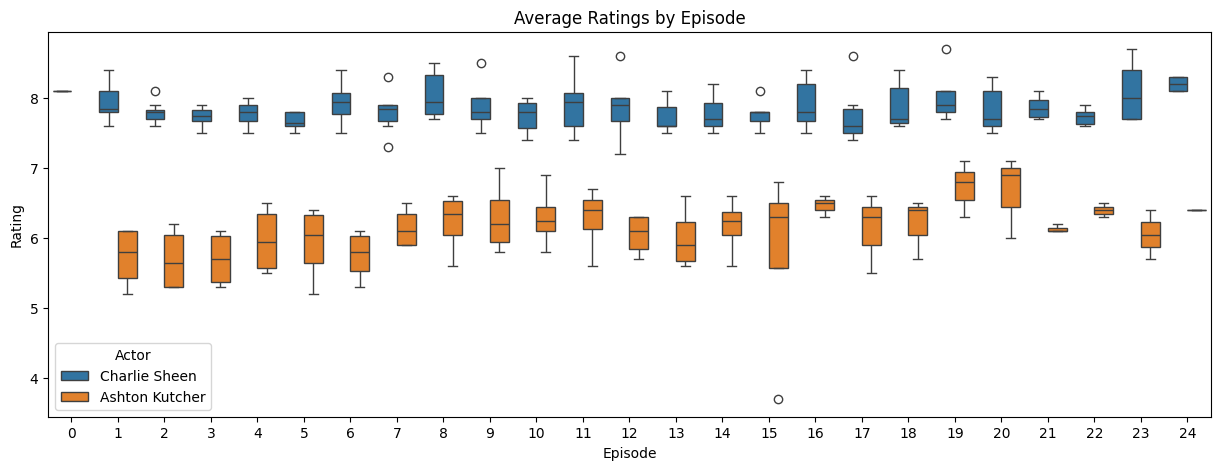

In [26]:
plt.figure(figsize=(15,5))
plt.title("Average Ratings by Episode")
sns.boxplot(x="Episode", y="Rating", data=rt, hue="Actor");

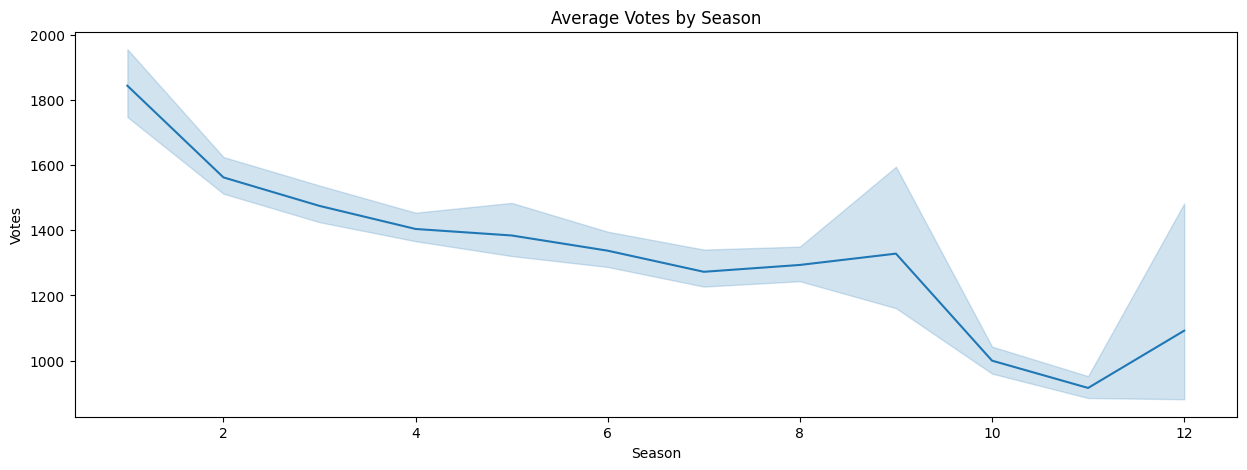

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(data=rt, x='Season', y='Votes')
plt.title("Average Votes by Season")
plt.show()

Text(0, 0.5, 'Votes')

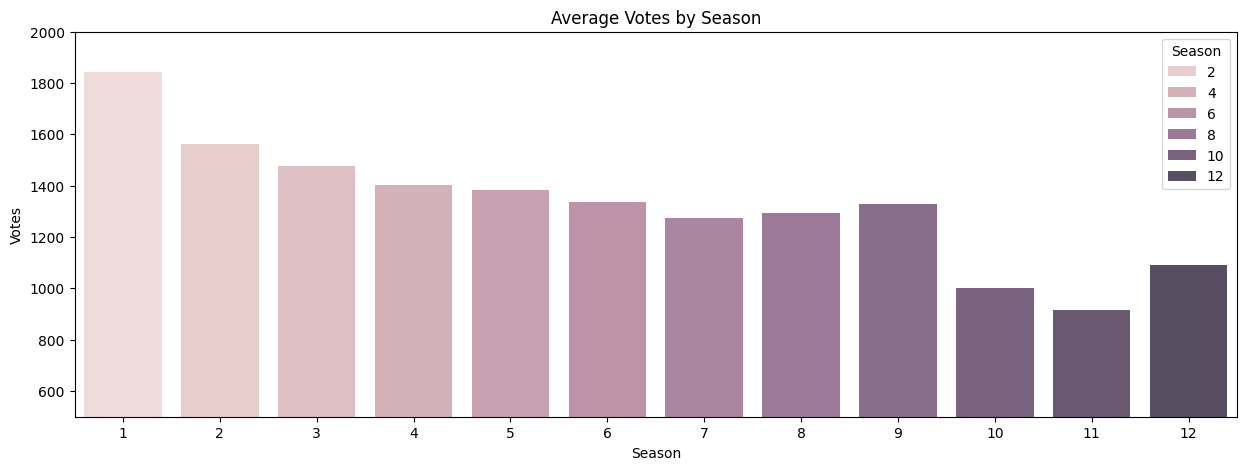

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(rt , x="Season", y="Votes",
            estimator="mean", errorbar=None, alpha=0.8, hue='Season')
plt.title("Average Votes by Season")
plt.ylim(500, 2000)
plt.ylabel("Votes")

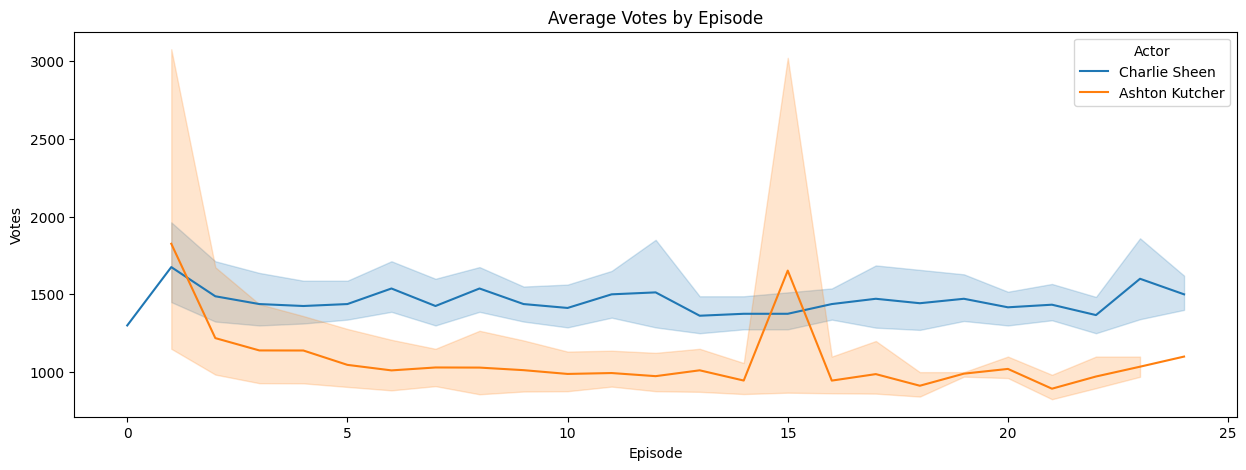

In [28]:
plt.figure(figsize=(15,5))
sns.lineplot(data=rt, x='Episode', y='Votes', hue="Actor" )
plt.title("Average Votes by Episode")
plt.show()

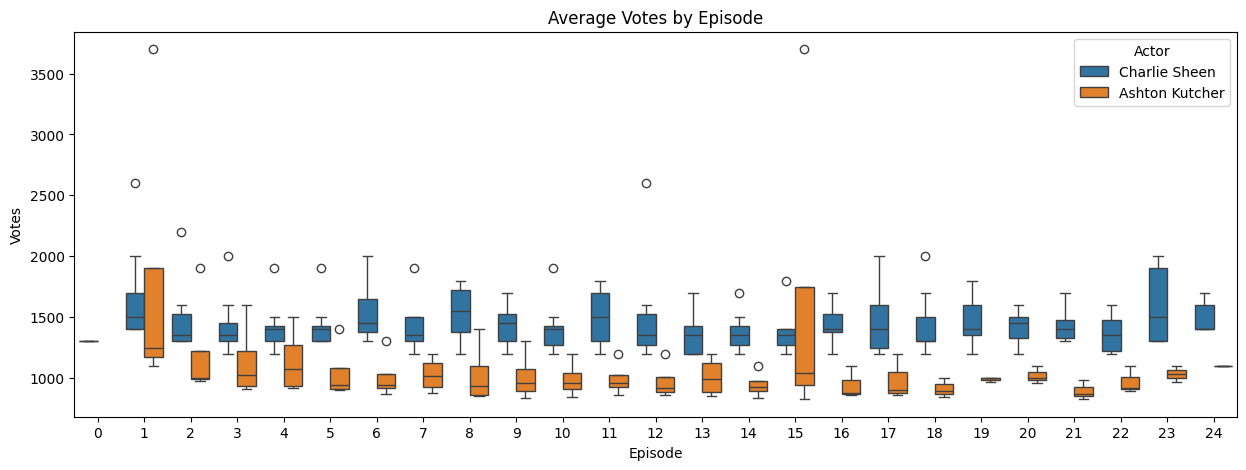

In [29]:
plt.figure(figsize=(15,5))
plt.title("Average Votes by Episode")
sns.boxplot(x="Episode", y="Votes", data=rt, hue="Actor");

Text(0.5, 1.0, 'Scatter plot of Ratings for different Description_length')

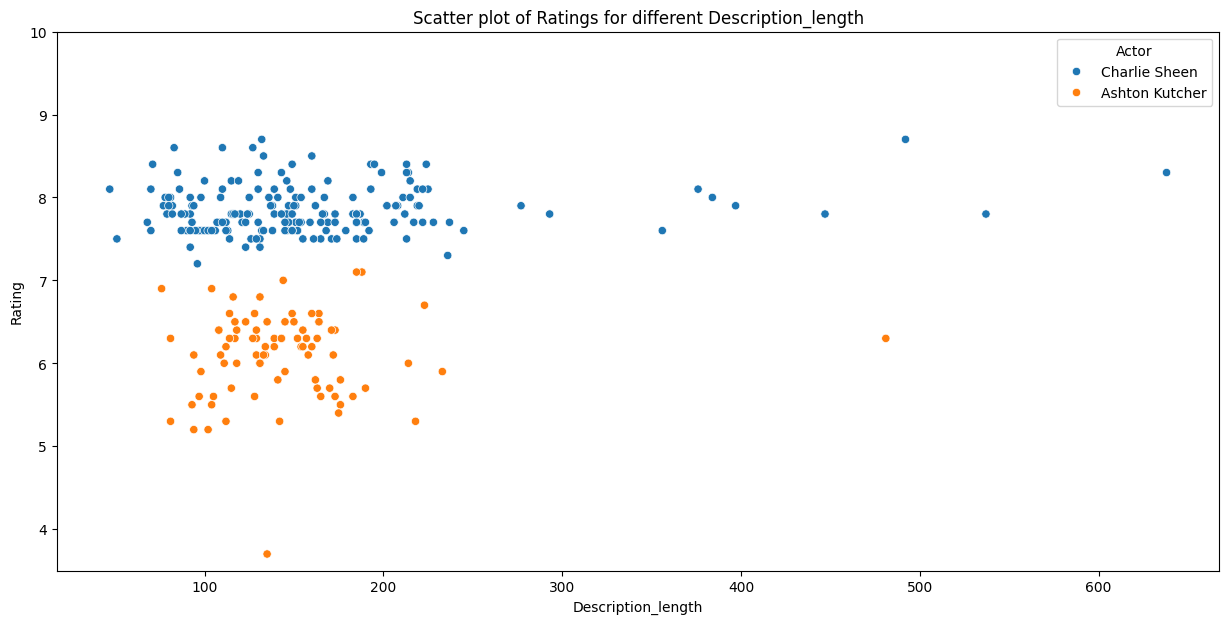

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(rt, x="Description_length", y="Rating", hue="Actor")
plt.ylim(3.5, 10)
plt.title("Scatter plot of Ratings for different Description_length")

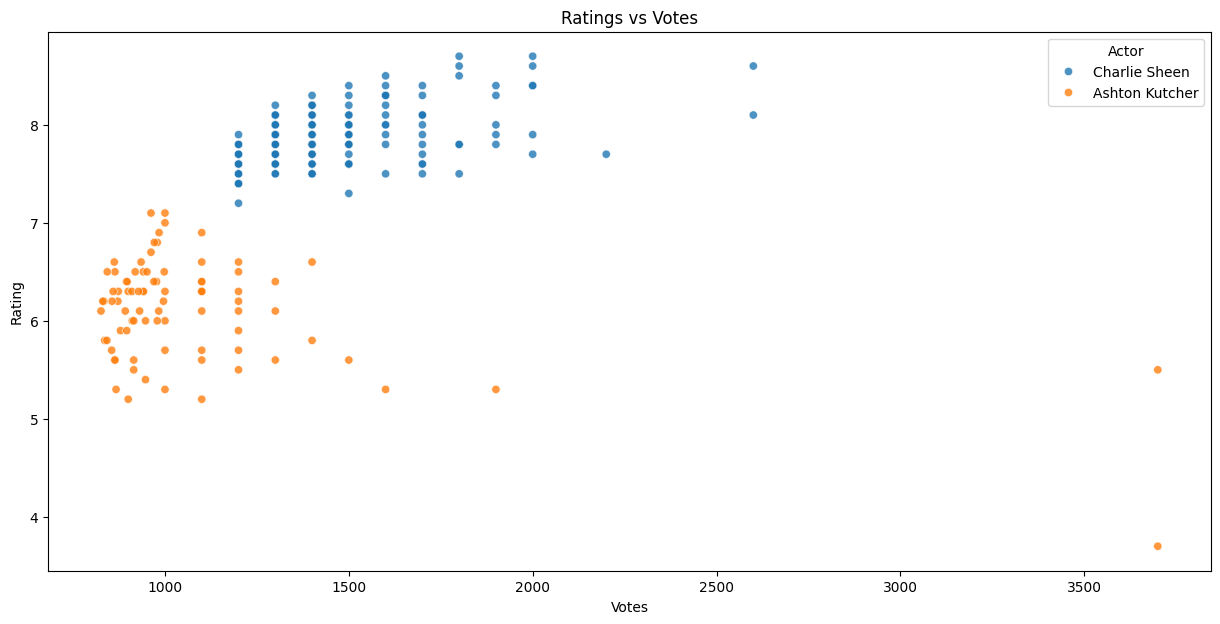

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(rt, x="Votes", y="Rating", hue="Actor", alpha=.8)
plt.title("Ratings vs Votes");

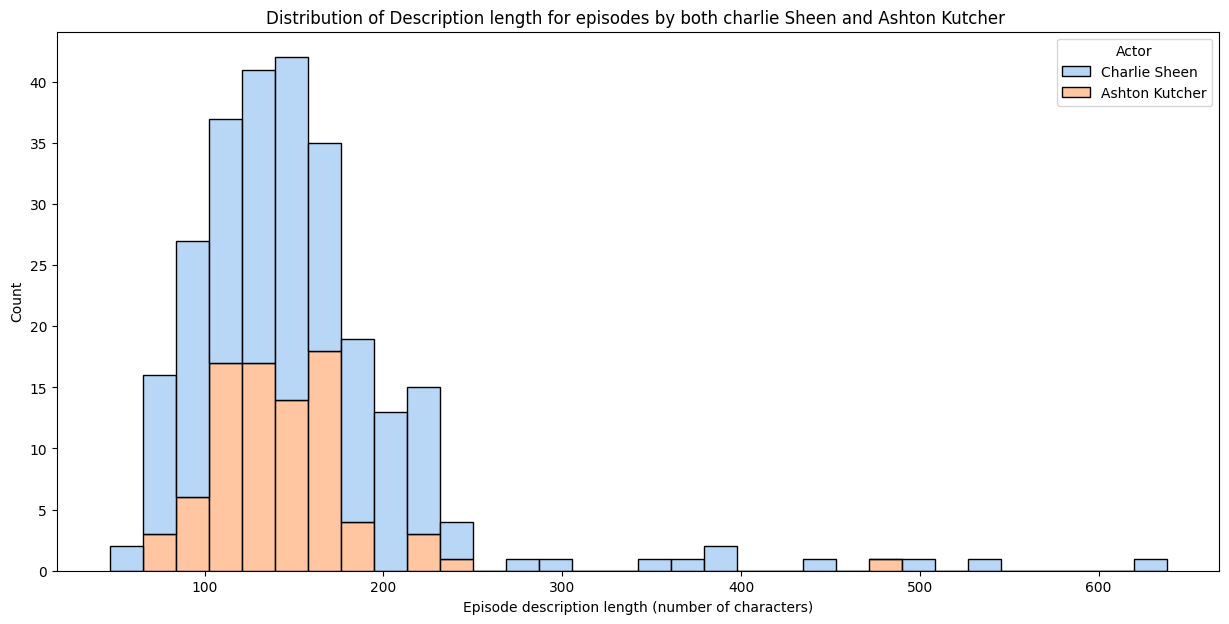

In [61]:
plt.figure(figsize=(15,7))
sns.histplot(data=rt, multiple="stack", x="Description_length", kde=False, palette="pastel", hue="Actor", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("Episode description length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of Description length for episodes by both charlie Sheen and Ashton Kutcher ")
plt.show()

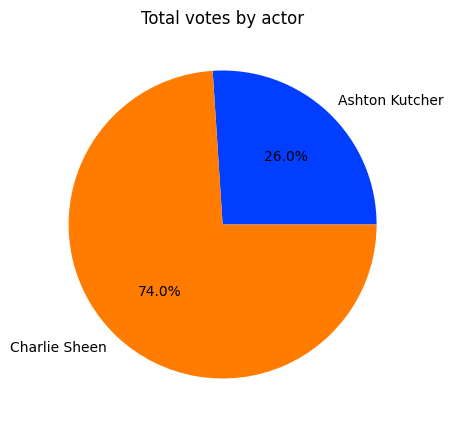

In [39]:
plt.figure(figsize=(5,5))
colors = sns.color_palette('bright')[0:5]
plt.pie(rt.groupby(["Actor"])["Votes"].sum(), labels=["Ashton Kutcher", "Charlie Sheen"],
        colors=colors, autopct='%.1f%%')
plt.title("Total votes by actor")

<ipython-input-111-b8d41632b21f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Actor", y="Rating", data=rt, palette="PRGn")


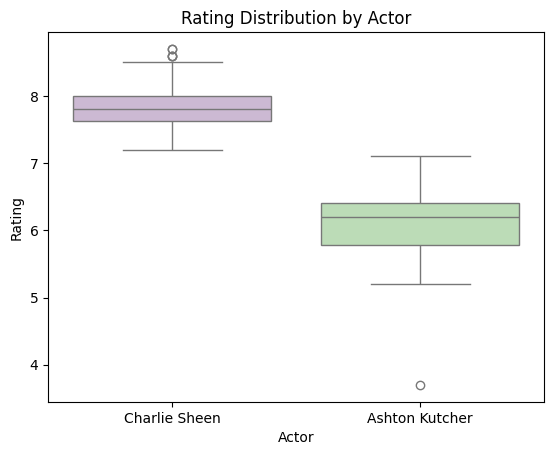

In [ ]:
plt.title("Rating Distribution by Actor")
sns.boxplot(x="Actor", y="Rating", data=rt, palette="PRGn")
plt.show()

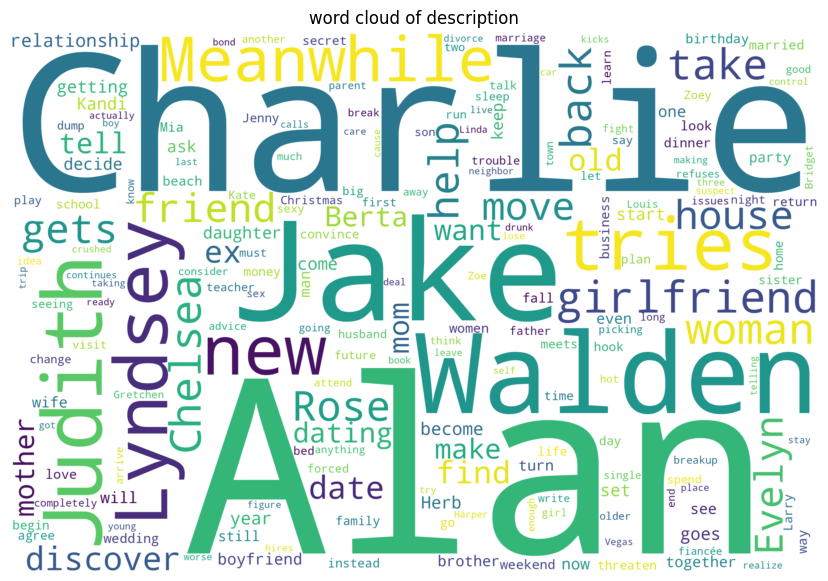

In [59]:
plt.figure(figsize=(12,7))
text = " ".join(Desc for Desc in rt.Description)
word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 3000, height = 2000).generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.title("word cloud of description")
plt.axis("off")
plt.show()

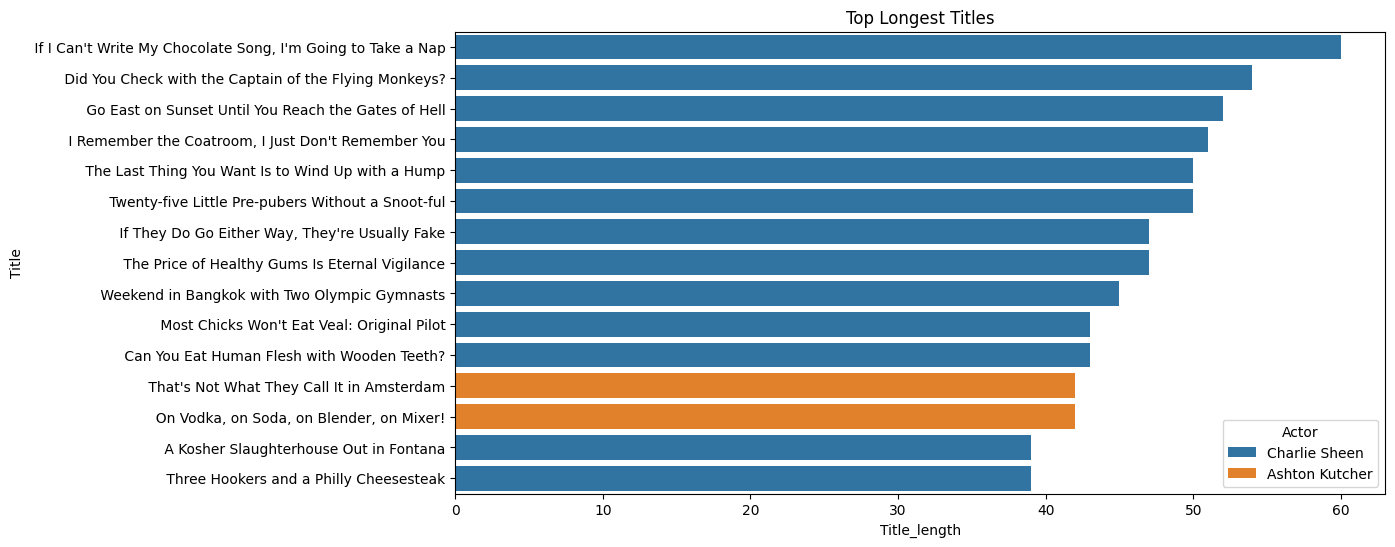

In [45]:
rt['Title_length'] = rt['Title'].str.len()
top_n = 15
longest_titles = rt.nlargest(top_n, 'Title_length')
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Title_length',
    y='Title',
    data=longest_titles,
    hue='Actor'
)
plt.title("Top Longest Titles");

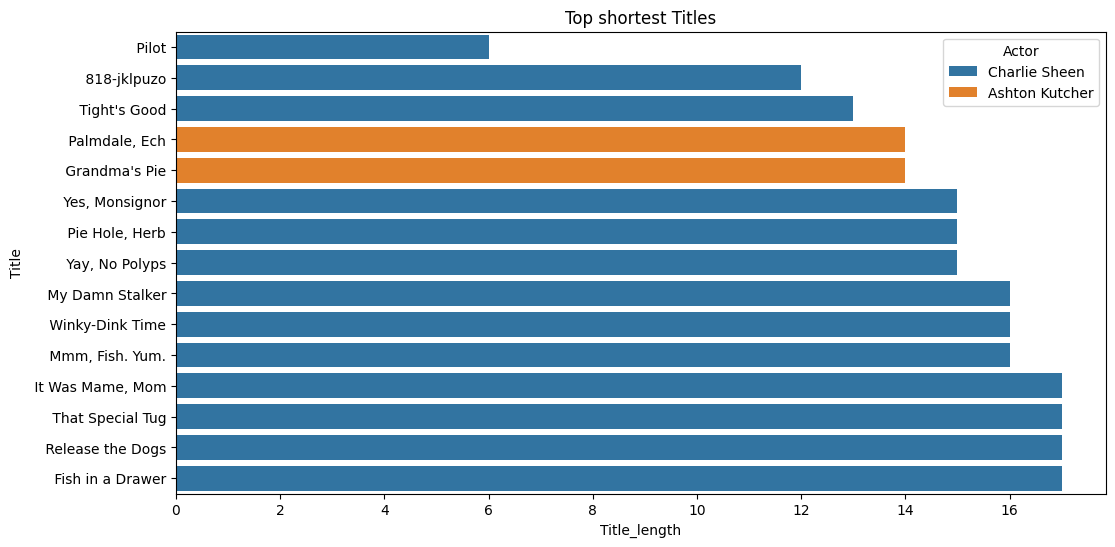

In [46]:
rt['Title_length'] = rt['Title'].str.len()
top_n = 15
longest_titles = rt.nsmallest(top_n, 'Title_length')
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Title_length',
    y='Title',
    data=longest_titles,
    hue='Actor'
)
plt.title("Top shortest Titles");

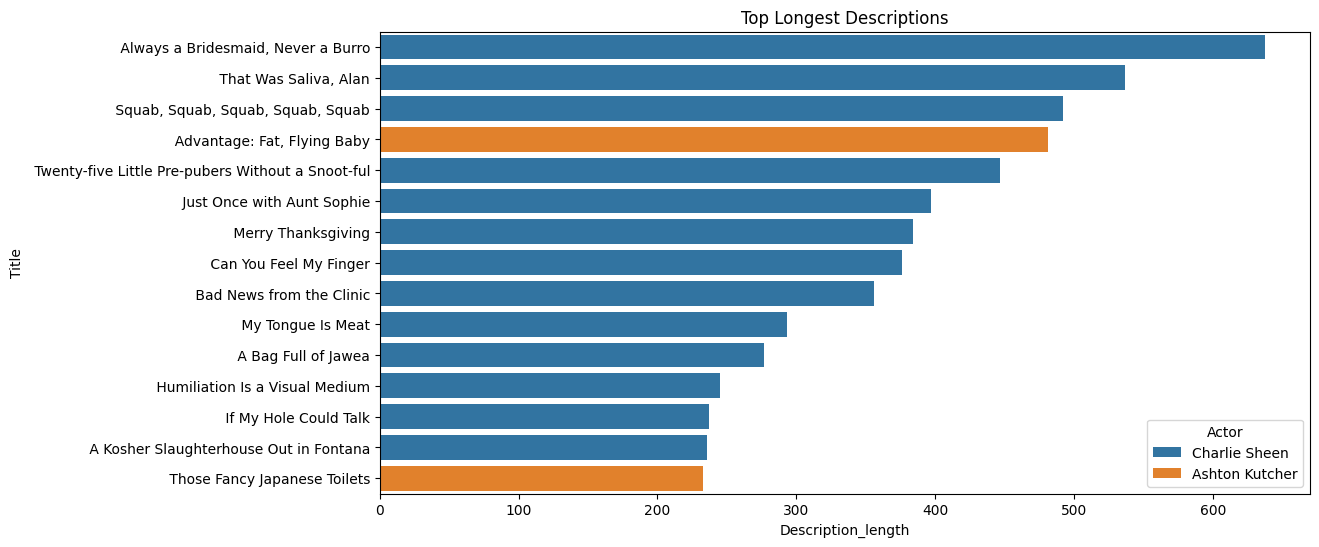

In [47]:
top_n = 15
longest_titles = rt.nlargest(top_n, 'Description_length')
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Description_length',
    y='Title',
    data=longest_titles,
    hue='Actor'

)
plt.title("Top Longest Descriptions");

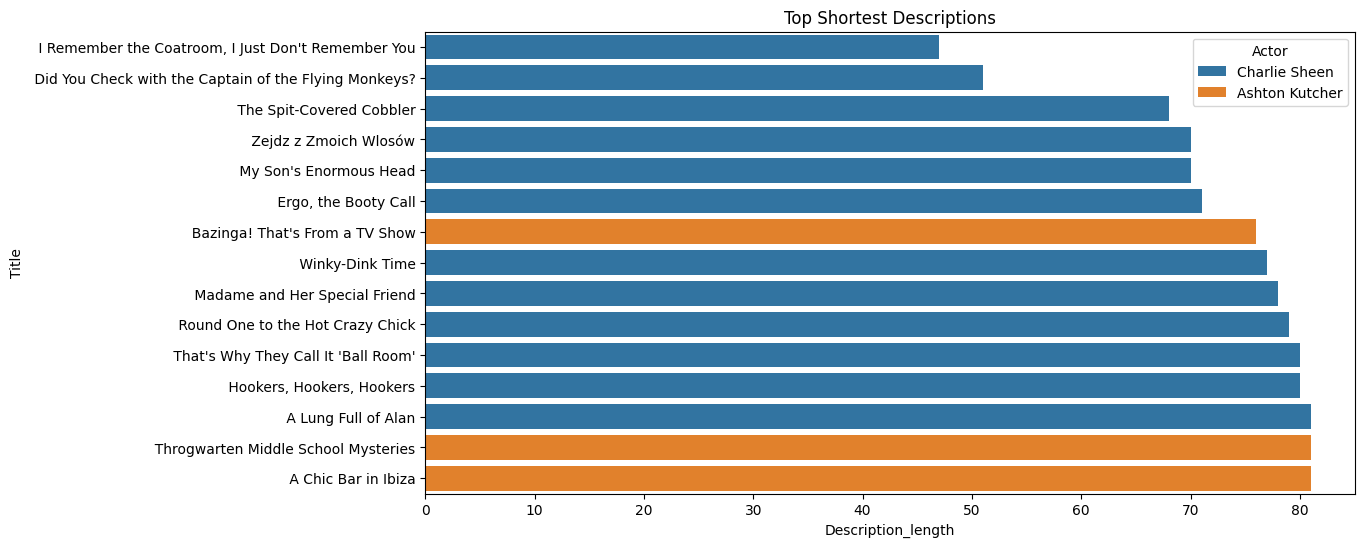

In [48]:
top_n = 15
longest_titles = rt.nsmallest(top_n, 'Description_length')
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Description_length',
    y='Title',
    data=longest_titles,
    hue='Actor'

)
plt.title("Top Shortest Descriptions");

### **Reviews**

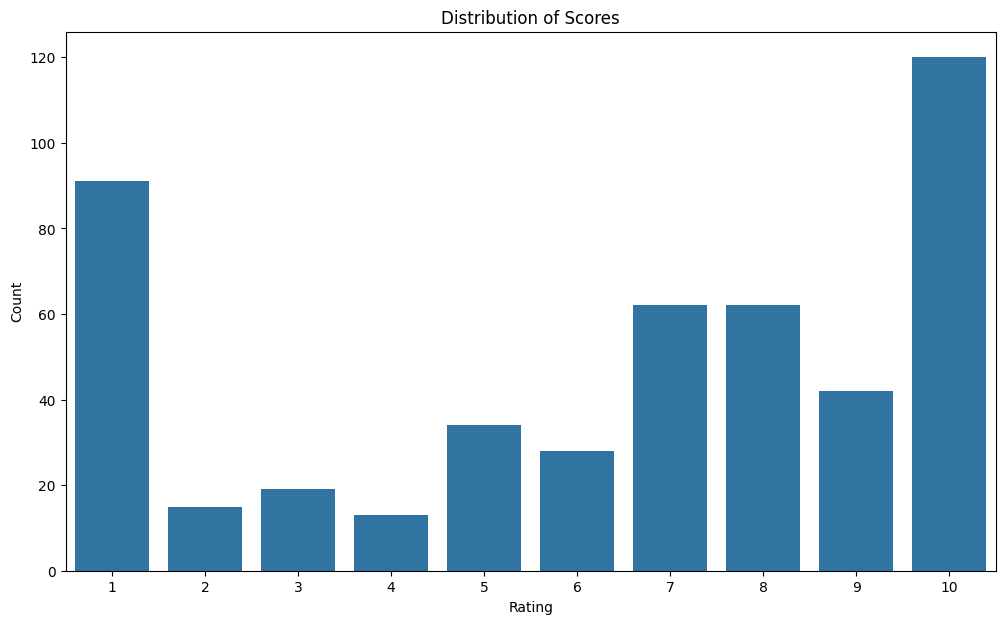

In [58]:
rating_counts = rv.Rating.value_counts().sort_index()
plt.figure(figsize=(12, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

#### **Natural language preprocessing (NLP)**

In [54]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [55]:
rv['desc_sentiment'] = rv['Desc_c'].apply(get_sentiment)
rv['tit_sentiment'] = rv['Tit_c'].apply(get_sentiment)
rv['Desc_sentiment'] = rv['desc_sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
rv['Tit_sentiment'] = rv['tit_sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))

In [56]:
rv[["Rating","Desc_sentiment","Tit_sentiment"]]

Rating Desc_sentiment Tit_sentiment
0         8       positive       neutral
1         8       positive      positive
2         7        neutral      negative
4        10       positive       neutral
5         6       positive       neutral
..      ...            ...           ...
537       3       positive      negative
538       5       positive       neutral
539       5        neutral      positive
540       1        neutral      negative
541       4       positive      negative

[486 rows x 3 columns]

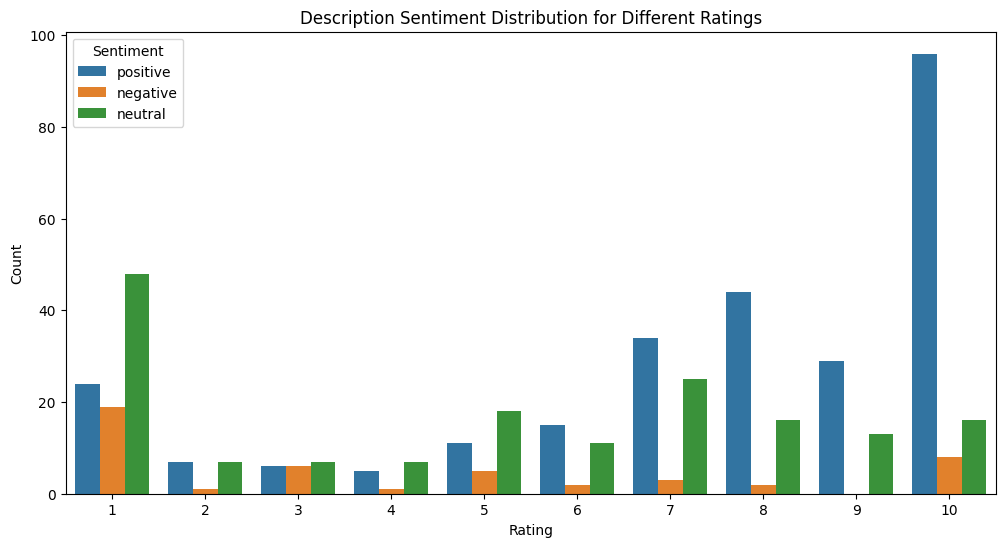

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(data=rv, x='Rating', hue='Desc_sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Description Sentiment Distribution for Different Ratings')
plt.legend(title='Sentiment')
plt.show()

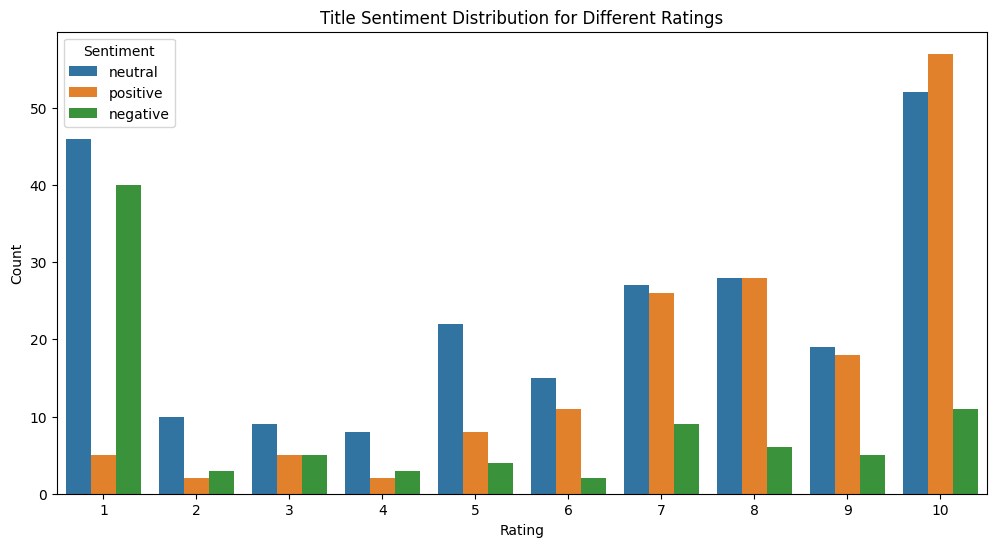

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(data=rv, x='Rating', hue='Tit_sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Title Sentiment Distribution for Different Ratings')
plt.legend(title='Sentiment')
plt.show()

In [65]:
stopwords = set(STOPWORDS)
stopwords.update(['charlie', 'sheen', 'kutcher', 'ashton','show', 'two','men','half','man','one','review','now','episode','series','alan','season','seasons'])
stopwords2 = set(STOPWORDS)
stopwords2.update(['season','show','great','good','best','funny','comedy','sitcom'])
tit_negative_reviews = ' '.join(rv[rv['Tit_sentiment'] == 'negative']['Tit_c'])
tit_neutral_reviews = ' '.join(rv[rv['Tit_sentiment'] == 'neutral']['Tit_c'])
tit_positive_reviews = ' '.join(rv[rv['Tit_sentiment'] == 'positive']['Tit_c'])
combined = ' '.join([tit_negative_reviews, tit_neutral_reviews])

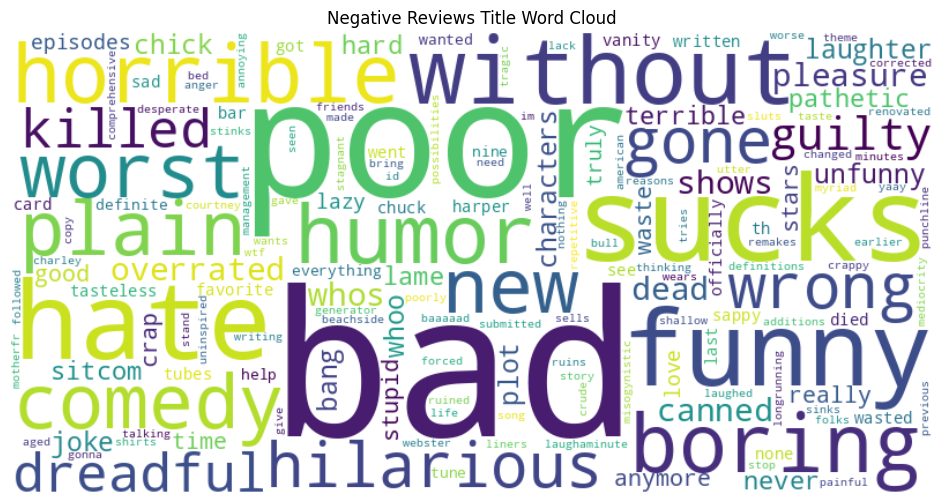

In [66]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(tit_negative_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Title Word Cloud')
plt.show()

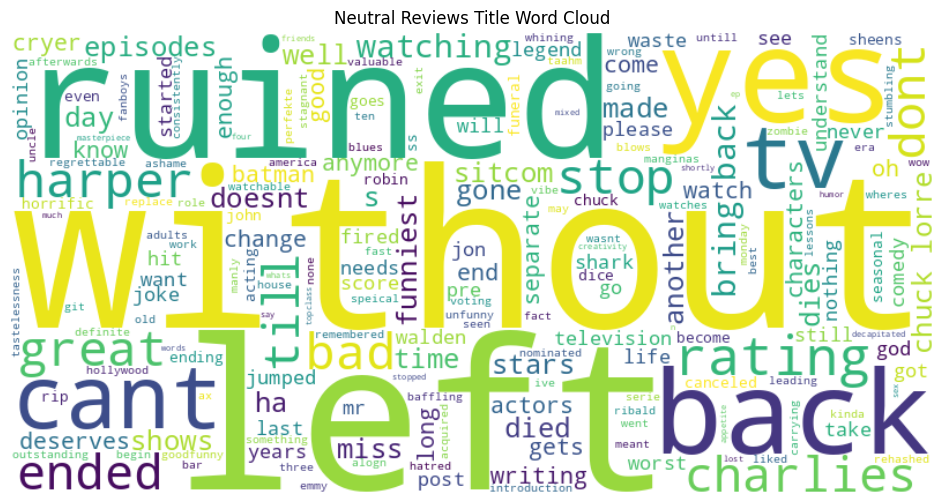

In [67]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(tit_neutral_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews Title Word Cloud')
plt.show()

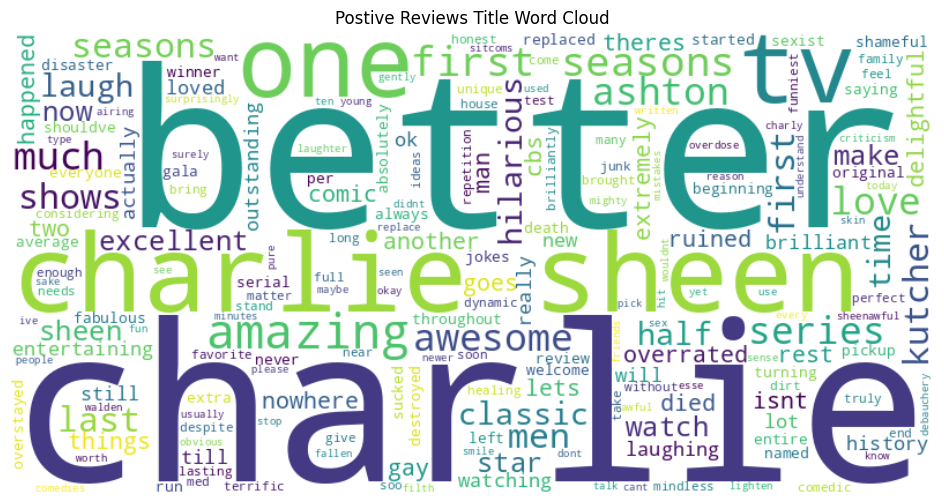

In [68]:
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=stopwords2).generate(tit_positive_reviews)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Postive Reviews Title Word Cloud')
plt.show()

# Determine outliers

### **Ratings**

<Axes: xlabel='Rating', ylabel='Count'>

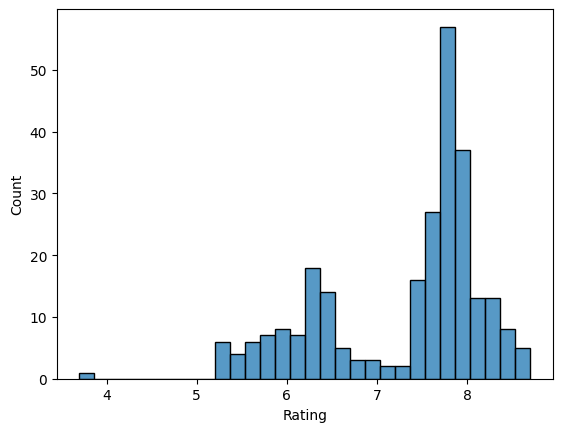

In [70]:
sns.histplot(x=rt["Rating"], bins=30)

<Axes: xlabel='Votes', ylabel='Count'>

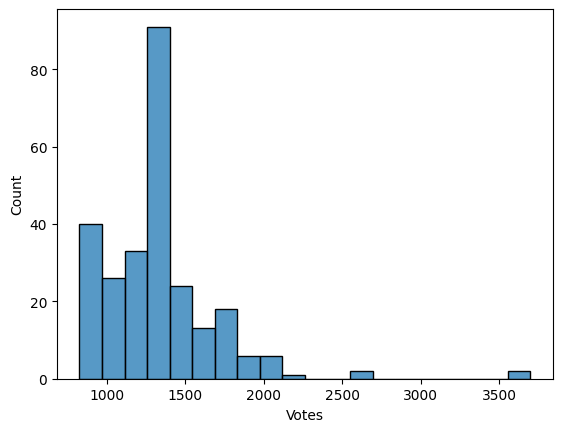

In [71]:
sns.histplot(x=rt["Votes"], bins=20)

<Axes: xlabel='Description_length', ylabel='Count'>

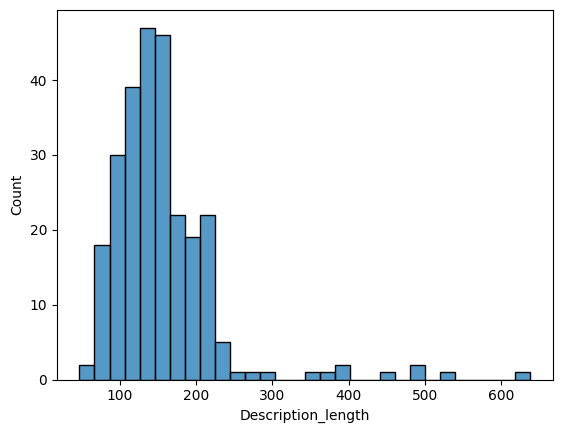

In [72]:
sns.histplot(x=rt["Description_length"], bins=30)

In [73]:
rt_clean = rt.copy()
count_variables = ["Rating","Votes","Description_length"]

for col in count_variables:
    Q1 = rt[col].quantile(0.25)
    Q3 = rt[col].quantile(0.75)
    IQR = Q3 - Q1
    median = rt[col].median()

    if col == "Rating":
        threshold =  Q1 - 1.5 * IQR
        outliers = (rt[col] < threshold).sum()
        rt_clean = rt_clean[rt_clean[col] >= threshold]
        print(f"Rating (Left-Skewed): {outliers}")
    elif col == "Votes":
        threshold = Q3 + 1.5 * IQR
        outliers = (rt[col] > threshold).sum()
        rt_clean = rt_clean[rt_clean[col] <= threshold]
        print(f"Votes (Right-Skewed): {outliers}")
    elif col == "Description_length":
        threshold = Q3 + 1.5 * IQR
        outliers = (rt[col] > threshold).sum()
        rt_clean = rt_clean[rt_clean[col] <= threshold]
        print(f"Description length (Right-Skewed): {outliers}")

Rating (Left-Skewed): 1
Votes (Right-Skewed): 5
Description length (Right-Skewed): 11


# Building models

## Ratings

### **Simple linear regression**

In [74]:
rt_lin=rt_clean.copy()

In [75]:
rt_lin = pd.get_dummies(rt_lin, columns=['Actor'], drop_first=True)
rt_lin.rename(columns={'Actor_Charlie Sheen':'Actor_Charlie_Sheen'},inplace=True)

In [76]:
rt_lin.head()

Season  Episode                                              Title  \
0       1        0         Most Chicks Won't Eat Veal: Original Pilot   
3       1        3   Go East on Sunset Until You Reach the Gates o...   
4       1        4   If I Can't Write My Chocolate Song, I'm Going...   
5       1        5   The Last Thing You Want Is to Wind Up with a ...   
6       1        6   Did You Check with the Captain of the Flying ...   

        Date  Rating  Votes  \
0 2006-06-02     8.1   1300   
3 2003-10-06     7.7   2000   
4 2003-10-13     7.9   1900   
5 2003-10-20     7.8   1900   
6 2003-10-27     7.5   1800   

                                         Description  Description_length  \
0  After his wife kicks him out of the house, Ala...                  86   
3  Charlie and Alan go out drinking. Alan tries t...                 154   
4  As Charlie tries to write a new jingle, Berta ...                 202   
5  Jake's soccer games lead to Alan and Charlie h...                  92   
6  Charlie and Evelyn date members of the same fa...                  51   

   Title_length  Actor_Charlie_Sheen  
0            43                 True  
3            52                 True  
4            60                 True  
5            50                 True  
6            54                 True

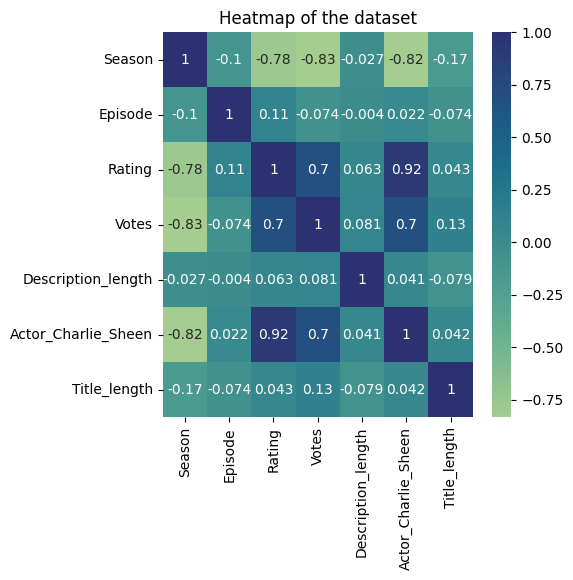

In [77]:
plt.figure(figsize=(5,5))
sns.heatmap(rt_lin[["Season", "Episode", "Rating", "Votes", "Description_length","Actor_Charlie_Sheen","Title_length"]].corr(),annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

In [78]:
ols_formula = 'Rating~C(Actor_Charlie_Sheen)'
OLS = ols(formula = ols_formula,data=rt_lin)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     1302.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          8.11e-100
Time:                        10:43:15   Log-Likelihood:                -88.252
No. Observations:                 246   AIC:                             180.5
Df Residuals:                     244   BIC:                             187.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.1395      0.039    158.868      0.000       6.063       6.216
C(Actor_Charlie_Sheen)[T.True]     1.7029      0.047     36.089      0.000       1.610       1.796
==============================================================================
Omnibus:                        2.118   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.854
Skew:                           0.115   Prob(JB):                        0.396
Kurtosis:                       3.358   Cond. No.                         3.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Actor_Charlie_Sheen', ylabel='Rating'>

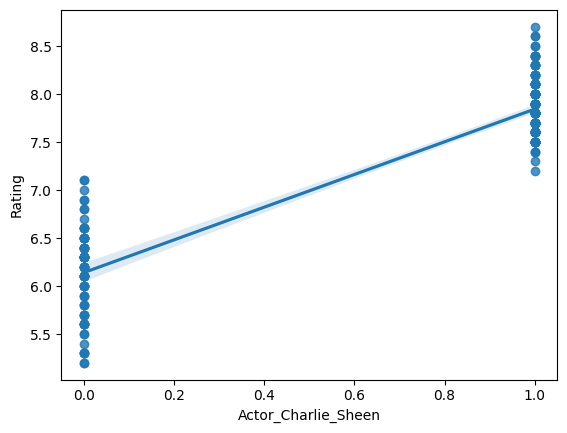

In [79]:
sns.regplot(x='Actor_Charlie_Sheen',y='Rating',data=rt_lin)

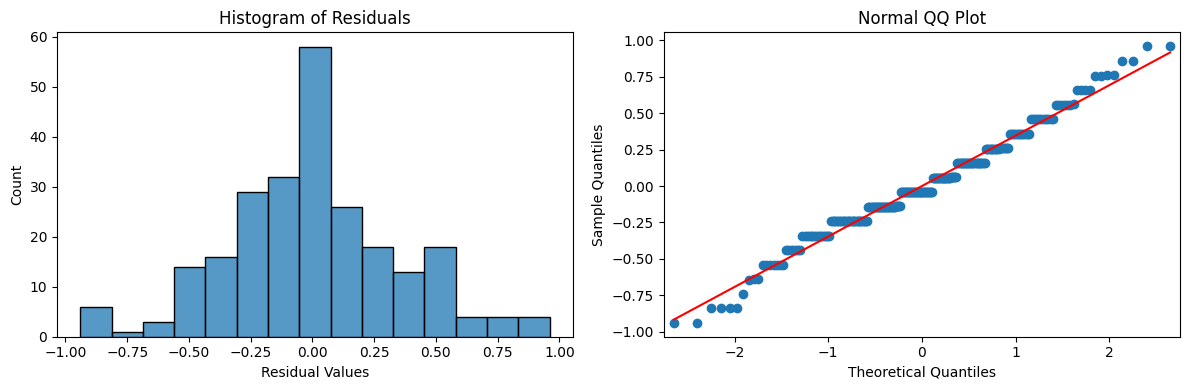

In [80]:
residuals = model.resid
fig,axes = plt.subplots(1,2,figsize=(12,4))
sns.histplot(residuals,ax=axes[0])
axes[0].set_xlabel('Residual Values')
axes[0].set_title('Histogram of Residuals')
sm.qqplot(residuals, line='s',ax=axes[1])
axes[1].set_title('Normal QQ Plot')
plt.tight_layout()

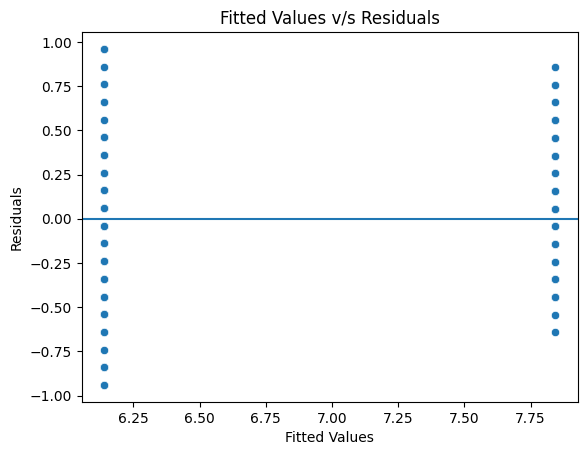

In [81]:
fig = sns.scatterplot(x=model.fittedvalues,y=model.resid)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted Values v/s Residuals')
fig.axhline(0)
plt.show()

### **Decision tree**

In [88]:
X = rt_lin.copy()
X = X.drop(columns=["Title", "Date","Description"], axis=1)
X.head()

Season  Episode  Rating  Votes  Description_length  Title_length  \
0       1        0     8.1   1300                  86            43   
3       1        3     7.7   2000                 154            52   
4       1        4     7.9   1900                 202            60   
5       1        5     7.8   1900                  92            50   
6       1        6     7.5   1800                  51            54   

   Actor_Charlie_Sheen  
0                 True  
3                 True  
4                 True  
5                 True  
6                 True

In [89]:
y = X["Rating"]
X = X.drop([ "Rating","Description_length","Title_length"], axis=1)

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [91]:
decision_tree = DecisionTreeRegressor(random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [92]:
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("Root Mean Squared Error (RMSE):", round(rmse, 3))
print("R² Score:", round(r2, 3))

Mean Absolute Error (MAE): 0.259
Mean Squared Error (MSE): 0.115
Root Mean Squared Error (RMSE): 0.34
R² Score: 0.81


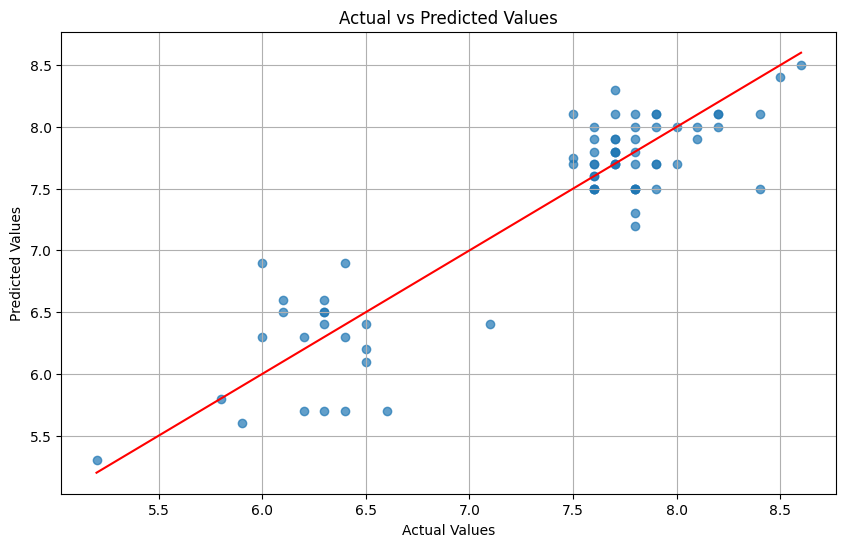

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()
plt.show()

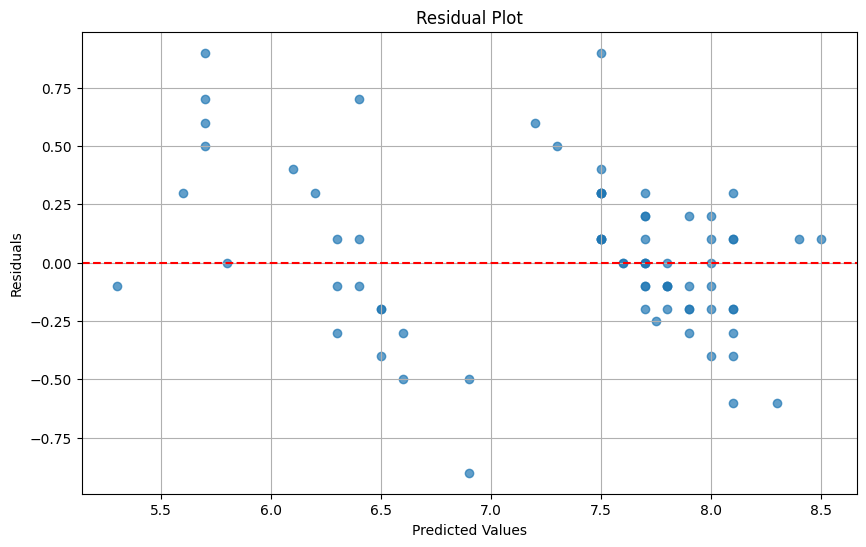

In [94]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()

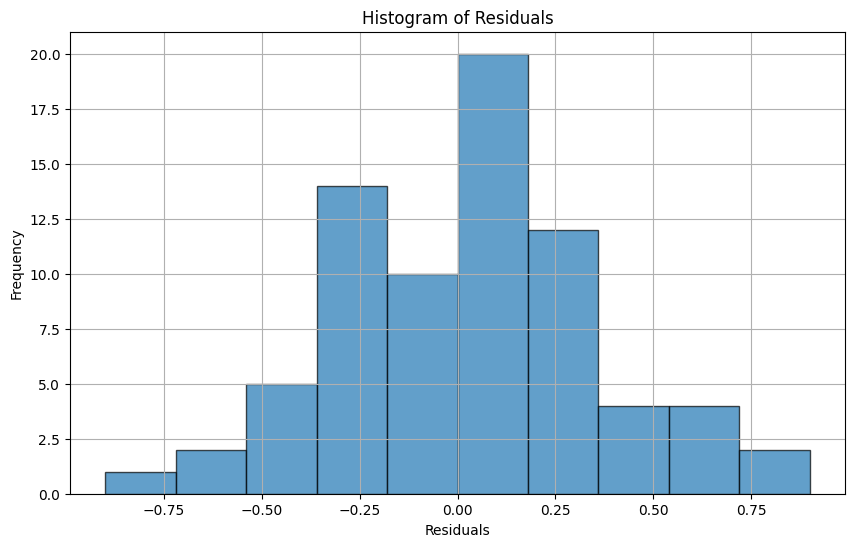

In [95]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid()
plt.show()

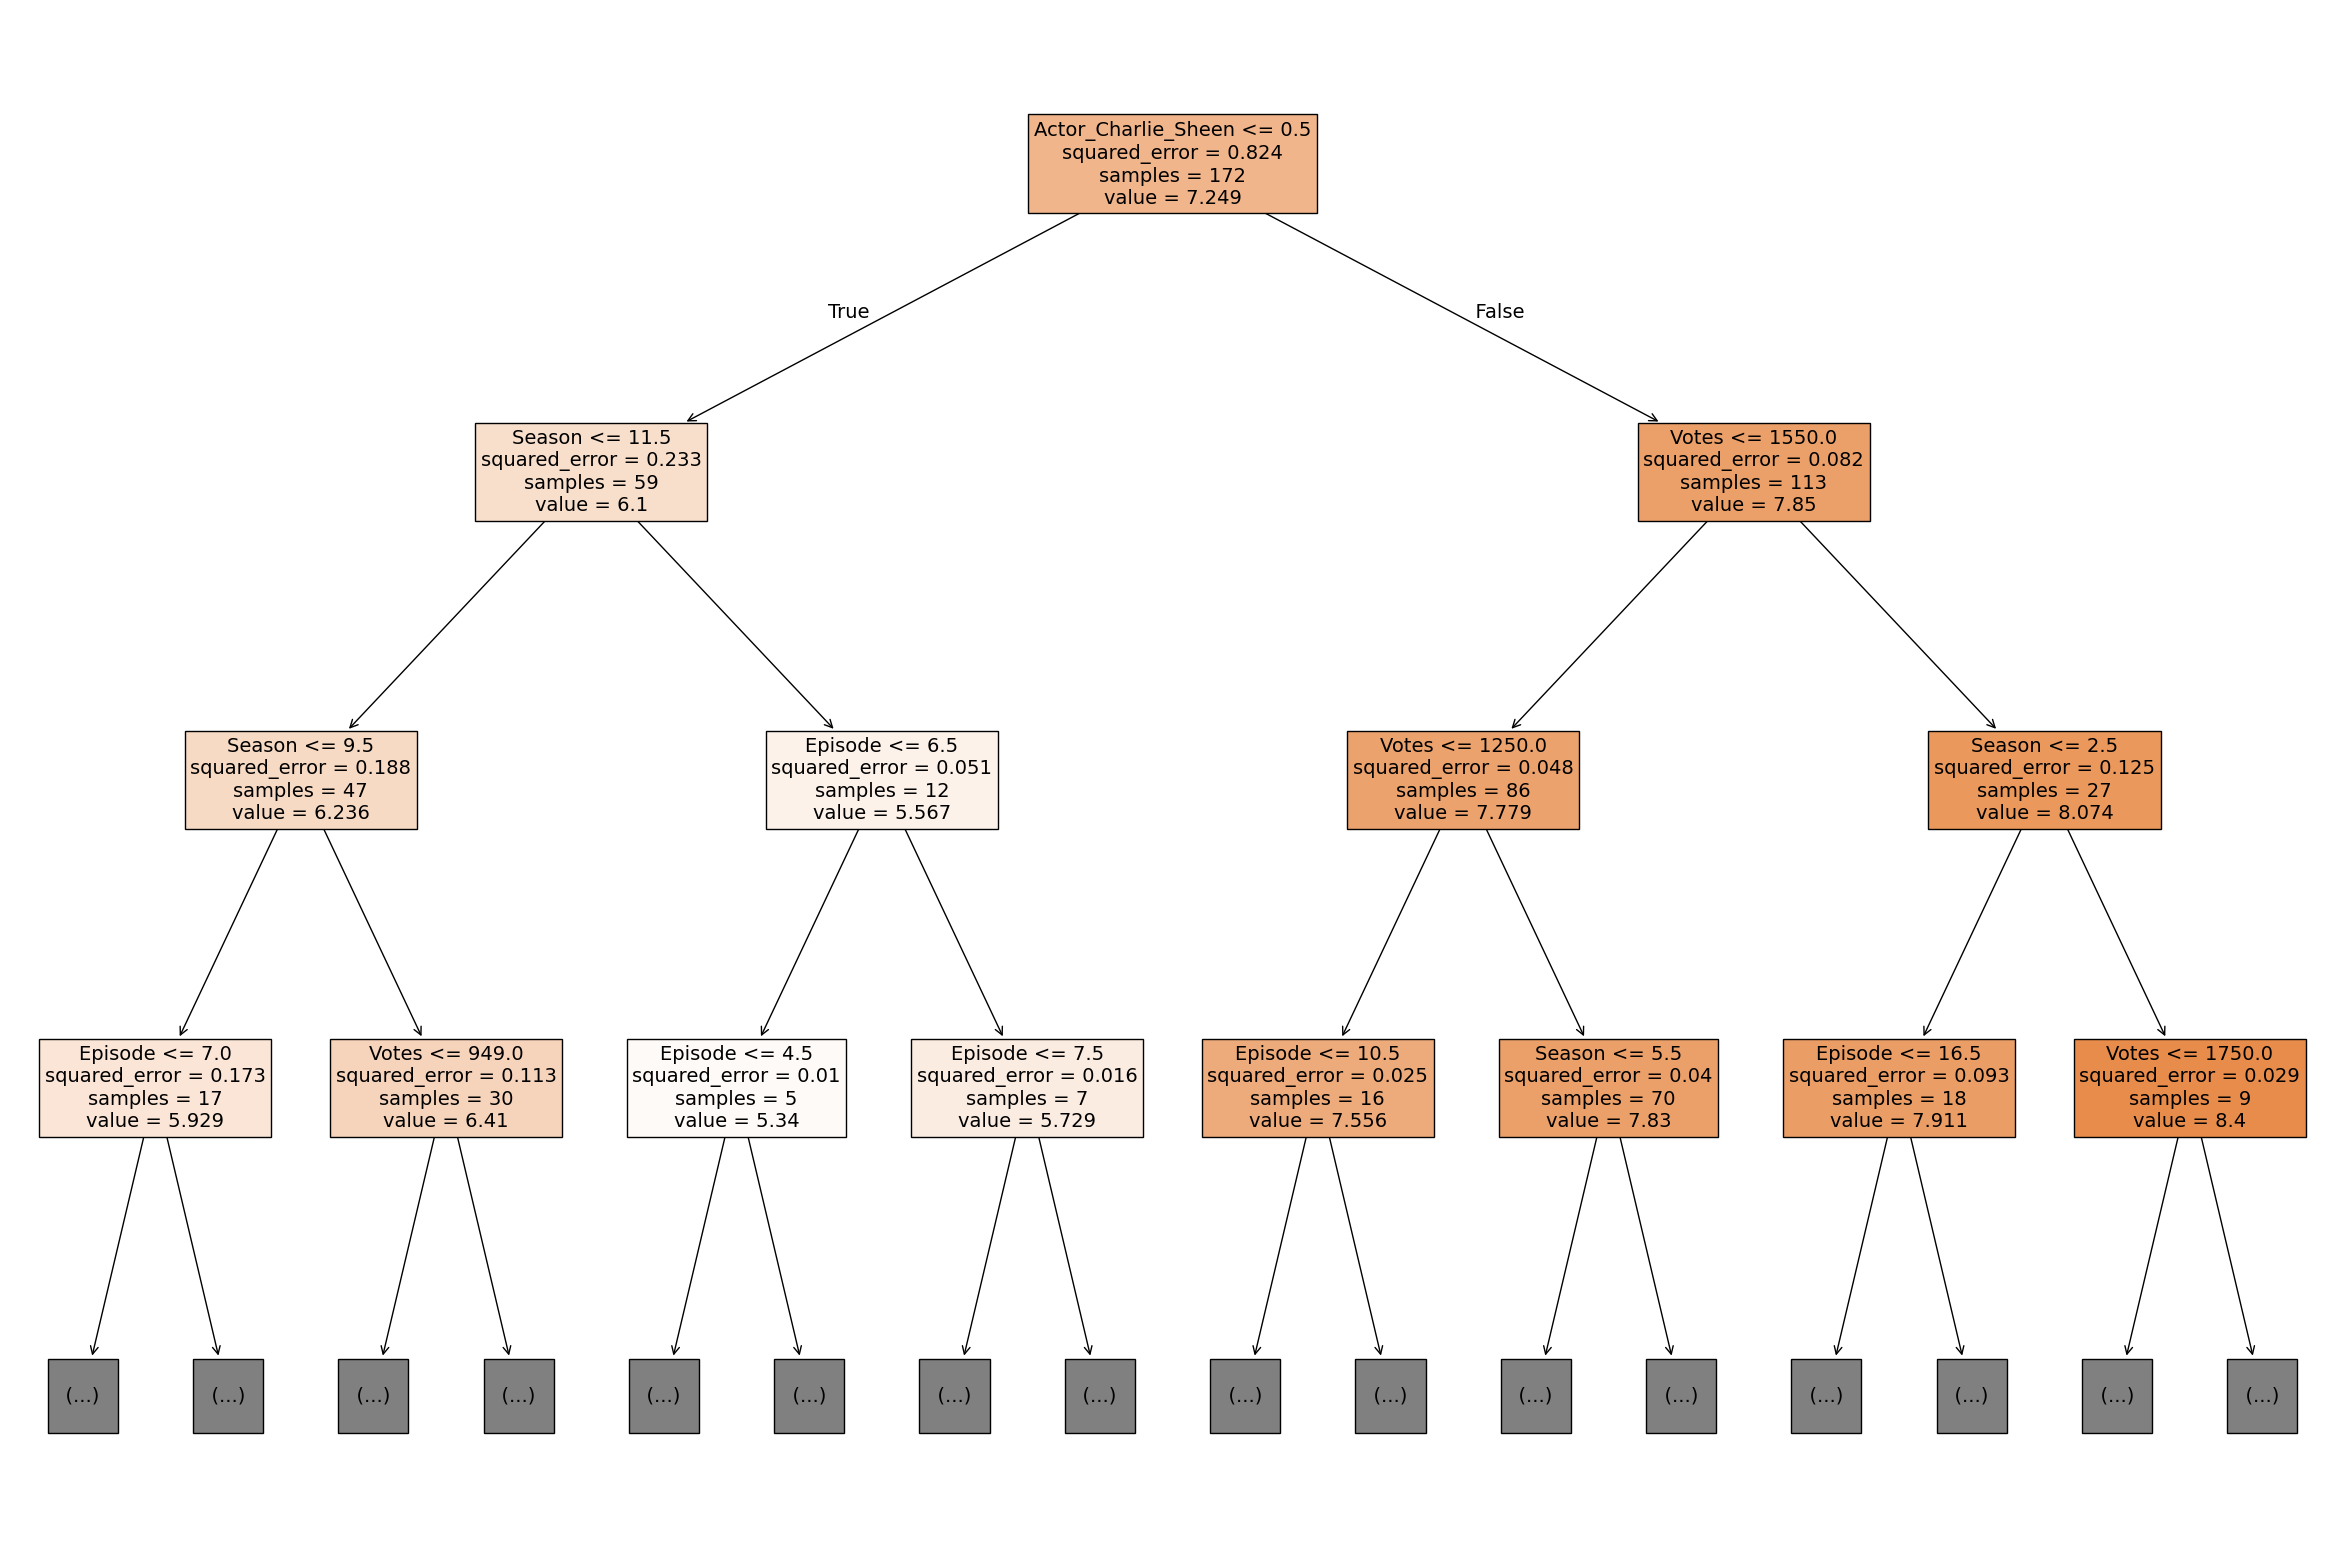

In [96]:
plt.figure(figsize=(30,20))
plot_tree(decision_tree, max_depth=3,
          fontsize=14,
          feature_names=X_train.columns,
         class_names={0:"opinion", 1:"claim"}, filled=True)
plt.show()

### **Random forest model**

In [ ]:
rf = RandomForestRegressor(random_state=0)
cv_params = {
    "max_depth": [5, 7, None],
    "max_features": [0.3, 0.6],
    "max_samples": [0.6],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [1,2,3],
    "n_estimators": [100, 200]
}
scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}
rf_cv = GridSearchCV(rf, param_grid=cv_params, scoring=scoring, cv=5, refit="r2")

In [ ]:
rf_cv.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200]},
             refit='r2',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error', 'r2': 'r2'})

In [ ]:
rf_cv.best_score_

0.9039152611486176

In [ ]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:

def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results["mean_test_r2"].idxmax(), :]

    mae = -best_estimator_results.mean_test_mae
    mse = -best_estimator_results.mean_test_mse
    r2 = best_estimator_results.mean_test_r2

    table = pd.DataFrame({
        "Model": [model_name],
        "MAE": [mae],
        "MSE": [mse],
        "R²": [r2]
    })

    return table

In [ ]:
rf_df = make_results("Random Forest CV", rf_cv)
rf_df

Model     MAE       MSE        R²
0  Random Forest CV  0.2038  0.067499  0.903915

In [ ]:
rf_cv.best_score_

0.9039152611486176

### **XGBoost model**


In [ ]:
xgb = XGBRegressor(objective="reg:squarederror", random_state=0)

cv_params = {
    "max_depth": [3,7,10],
    "min_child_weight": [0, 3, 8, 10],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [80, 300, 500],
    "subsample": [0.8, 1]
}

scoring = {
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

xgb_cv = GridSearchCV(
    estimator=xgb,
    param_grid=cv_params,
    scoring=scoring,
    refit="r2",
    cv=5,
)

In [ ]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 7, 10],
                         'min_child_weight': [0, 3, 8, 10],
                         'n_estimators': [80, 300, 500],
                         'subsample': [0.8, 1]},
             refit='r2',
             scoring={'mae': 'neg_mean_absolute_error',
                      'mse': 'neg_mean_squared_error', 'r2': 'r2'})

In [ ]:
xgb_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 0,
 'n_estimators': 500,
 'subsample': 0.8}

In [ ]:
xgb_cv.best_score_

0.8999025157388683

In [ ]:
xgb_df = make_results("XGBoost CV", xgb_cv)
xgb_df

Model       MAE       MSE        R²
0  XGBoost CV  0.198184  0.070095  0.899903

In [ ]:
pd.concat([rf_df, xgb_df])

Model       MAE       MSE        R²
0  Random Forest CV  0.203800  0.067499  0.903915
0        XGBoost CV  0.198184  0.070095  0.899903

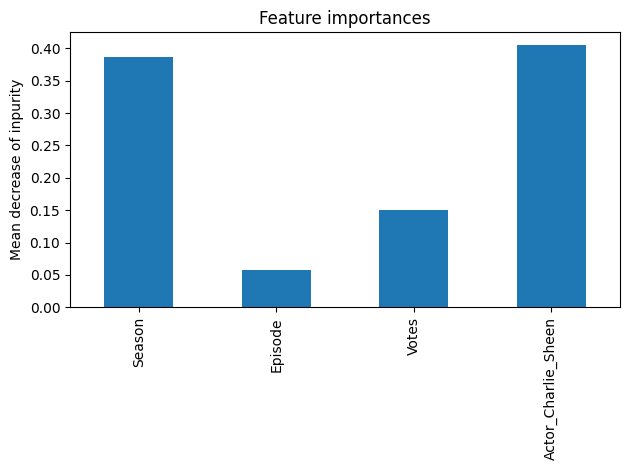

In [ ]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease of inpurity")
fig.tight_layout()

## Reviews

### **Sentiment Classifier**

In [ ]:
vectorizer = CountVectorizer()
train_data,test_data = train_test_split(rv,train_size=0.8,random_state=0)

X_train = vectorizer.fit_transform(train_data['Tit_c'])
y_train = train_data['Tit_sentiment']
X_test = vectorizer.transform(test_data['Tit_c'])
y_test = test_data['Tit_sentiment']

**Logistic regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

**Naive Bayes**

In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

**Support Vector Machine (SVM)**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

**Neural Network**

In [ ]:
nn = MLPClassifier()
nn.fit(X_train,y_train)

MLPClassifier()

In [ ]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Neural Network'] = nn.predict(X_train)
df2.head()

Title       Date  Rating  Thumbs_up  \
440  I stand corrected about my previous review 2020-06-08       8          0   
511                                Hit or Miss! 2008-10-31       5          1   
249                Till season 8 it's topclass. 2018-12-24      10          1   
534                                      Comic? 2019-08-14       3          0   
243                  I had same opinion but.... 2021-03-04      10          2   

     Thumbs_down                                        Description  \
440            2  The show after the 8th season is actually pret...   
511            3  I like this show and hate it at the same time....   
249            0  After season 8 the show deserves 1 out of 10 s...   
534            5  Which casting team ever thought Jon Cryer had ...   
243            1  I never saw season 9 knowing Charlie left. But...   

                                                Desc_c  \
440  the show after the th season is actually prett...   
511  i like this show and hate it at the same time ...   
249  after season  the show deserves  out of  stars...   
534  which casting team ever thought jon cryer had ...   
243  i never saw season  knowing charlie left but r...   

                                          Tit_c  desc_sentiment  \
440  i stand corrected about my previous review        0.199702   
511                                 hit or miss       -0.129158   
249                   till season  its topclass       -0.500000   
534                                       comic        0.250000   
243                      i had same opinion but        0.337500   

     tit_sentiment Desc_sentiment Tit_sentiment Logistic Regression  \
440      -0.166667       positive      negative            negative   
511       0.000000       negative       neutral             neutral   
249       0.000000       negative       neutral             neutral   
534       0.250000       positive      positive            positive   
243       0.000000       positive       neutral             neutral   

    Naive Bayes       SVM Neural Network  
440    negative  negative       negative  
511     neutral   neutral        neutral  
249     neutral   neutral        neutral  
534    positive   neutral       positive  
243     neutral   neutral        neutral

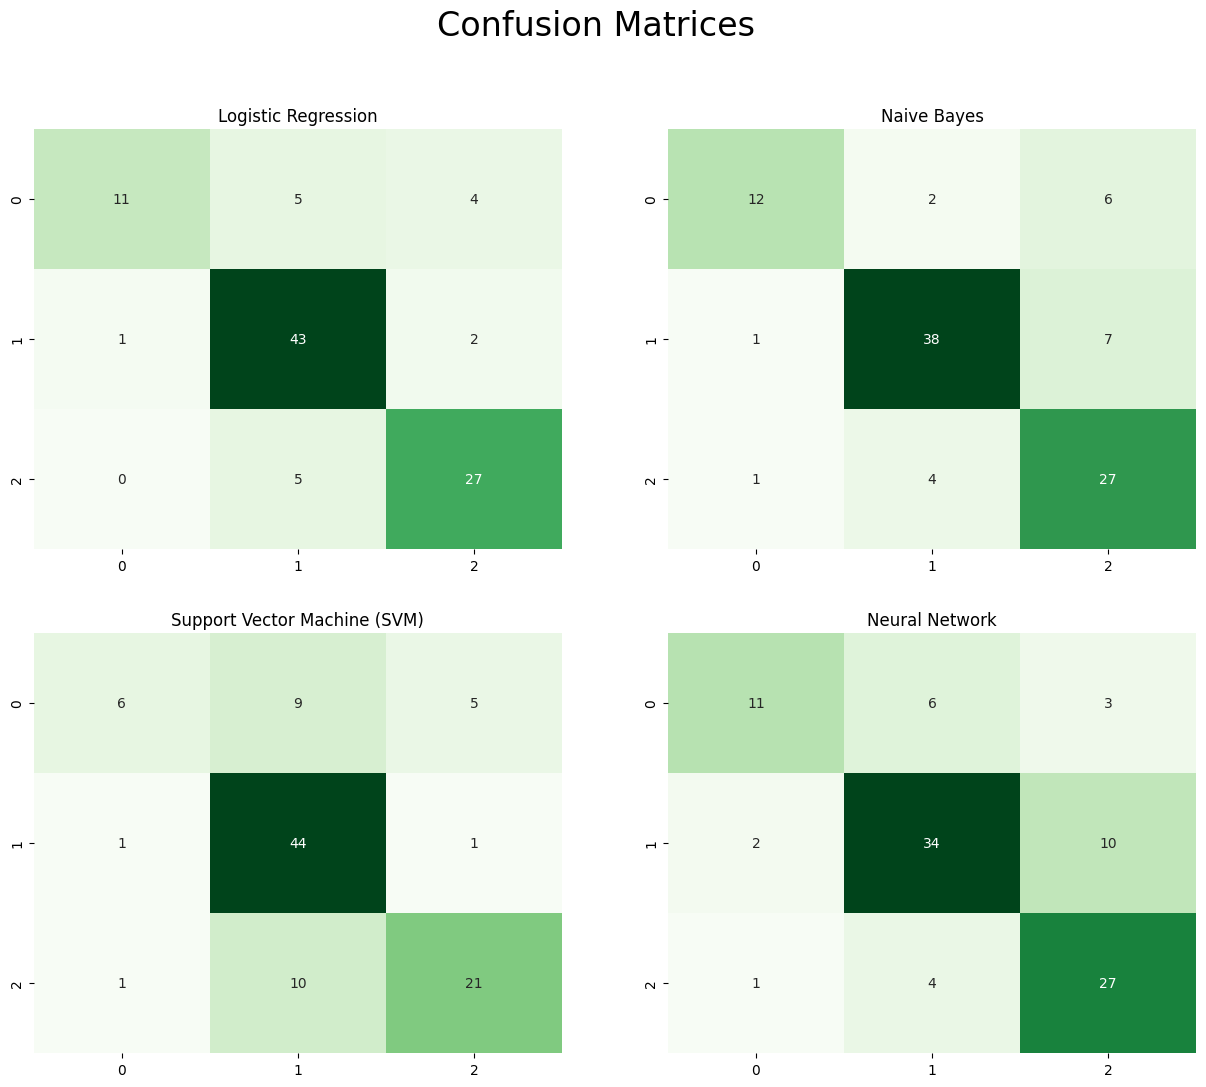

In [ ]:
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False);

In [ ]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

    negative       0.92      0.55      0.69        20
     neutral       0.81      0.93      0.87        46
    positive       0.82      0.84      0.83        32

    accuracy                           0.83        98
   macro avg       0.85      0.78      0.80        98
weighted avg       0.84      0.83      0.82        98


 Naive Bayes
              precision    recall  f1-score   support

    negative       0.86      0.60      0.71        20
     neutral       0.86      0.83      0.84        46
    positive       0.68      0.84      0.75        32

    accuracy                           0.79        98
   macro avg       0.80      0.76      0.77        98
weighted avg       0.80      0.79      0.79        98


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

    negative       0.75      0.30      0.43        20
     neutral       0.70      0.96      0.81        46
    positi